---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('fraud_data.csv')
df.columns

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28',
       u'Amount', u'Class'],
      dtype='object')

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
def answer_one():
    
    # Your code here
    temp=pd.DataFrame((df['Class'].value_counts()/df['Class'].count()))
    fraudpcnt=temp.iloc[1]['Class']
    
    return fraudpcnt# Return your answer


In [6]:
answer_one()

0.016410823768035772

In [7]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [9]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dc=DummyClassifier(strategy='most_frequent')
    dc.fit(X_train,y_train)
    y_pred=dc.predict(X_test)
    accuracy_score=dc.score(X_test,y_test)
    rec_score=recall_score(y_test,y_pred)
    
    return (accuracy_score,rec_score)# Return your answer

In [10]:
answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [ ]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    svc=SVC()
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    acc_score=svc.score(X_test,y_test)
    rec_score=recall_score(y_test,y_pred)
    prec_score=precision_score(y_test,y_pred)
    
    return (acc_score,rec_score,prec_score) # Return your answer

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [11]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svc=SVC(C=1e9,gamma=1e-07)
    svc.fit(X_train,y_train)
    y_pred=svc.decision_function(X_test)
    val=-220
    y_pred_adj=np.zeros_like(y_pred)
    y_pred_adj[np.where(y_pred>val)]=1
    conf_mat=confusion_matrix(y_test,y_pred_adj)

    # Your code here
    
    return conf_mat# Return your answer

In [12]:
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [14]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve , roc_curve

    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred_p=lr.decision_function(X_test)
    precision,recall,threshold=precision_recall_curve(y_test,y_pred_p)
    rec_val=recall[np.where(precision==0.75)][0]
    fpr,tpr,threshold=roc_curve(y_test,y_pred_p)
    tpr_val=tpr[np.where((fpr>0.159) & (fpr <0.161))][0]
    
    return (rec_val,tpr_val)# Return your answer

In [15]:
answer_five()

(0.82499999999999996, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [16]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression()
    param_grid=[{'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}]
    gcv=GridSearchCV(lr,param_grid=param_grid,cv=3,scoring='recall')
    gcv.fit(X_train,y_train)
    res=gcv.cv_results_['mean_test_score'].reshape(5,2)
    
    return res# Return your answer

In [17]:
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.8115942 ]])

<IPython.core.display.Javascript object>


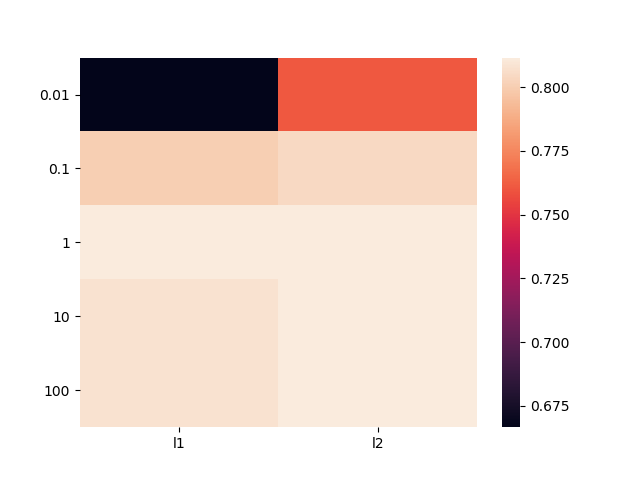

In [18]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())